### Makerble Assignment
###### Submitted by - Niharyka Singh

In [1]:
# For getting multiple inputs within a cell
from IPython.display import Image;from datetime import date
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#reading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind, spearmanr
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
# setting working directory
import io
%cd "D:\4_interview"

D:\4_interview


C:\Users\sniha\miniconda3\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
# Loading data
df= pd.read_csv("employee_experience_survey_data.csv")
df.shape
df.head(5)

(15, 18)

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree


In [5]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name                              15 non-null     object
 1   Age Bracket                       15 non-null     object
 2   Gender                            15 non-null     object
 3   Ethnicity                         15 non-null     object
 4   Job Title                         15 non-null     object
 5   Department                        15 non-null     object
 6   Date Survey Completed             15 non-null     object
 7   Job Satisfaction                  15 non-null     object
 8   Work-Life Balance                 15 non-null     object
 9   Management Support                15 non-null     object
 10  Team Collaboration                15 non-null     object
 11  Workload Fairness                 15 non-null     object
 12  Career Development Oppor

In [6]:
# checking summmary of data
df.describe(include= "all")

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
count,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
unique,15,4,2,6,8,8,7,5,5,5,5,5,5,4,5,5,5,5
top,John Doe,18-24,Female,Middle Eastern,UX Designer,Sales,2024-10-07,Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Agree,Neutral,Strongly Disagree,Neutral,Agree,Strongly Agree
freq,1,7,9,4,4,4,4,4,5,5,5,5,6,5,4,6,7,4


#### Converting ordinal likert character columns to numerical columns
1. Since most of the columns are on Likert Scale and are categories, we need to convert those columns into numeric columns
2. All the columns are ordinal (from strongly agree to strongly disagree), we will be replacing these values by ordered numerics

In [7]:
# numeric replacements for level of categorical columns
labels_map_dict = {"Strongly Agree":1,"Agree":2,"Neutral":3,"Disagree":4,"Strongly Disagree":5}

In [8]:
# list of the columns which need to be converted to numericals
ordinal_cols = ["Job Satisfaction","Work-Life Balance","Management Support","Team Collaboration","Workload Fairness","Career Development Opportunities","Workplace Inclusivity","Company Communication","Compensation Satisfaction","Job Security","Overall Engagement"]
print(ordinal_cols)

['Job Satisfaction', 'Work-Life Balance', 'Management Support', 'Team Collaboration', 'Workload Fairness', 'Career Development Opportunities', 'Workplace Inclusivity', 'Company Communication', 'Compensation Satisfaction', 'Job Security', 'Overall Engagement']


In [9]:
#replacing likert levels in the categorical columns by numerical values (label encoding)
for i in ordinal_cols:
    df[i] = df[i].map(labels_map_dict)

### Descriptive Statistics
##### Univariate Analysis of Overall Engagement and Job Satisfaction

In [10]:
# univariate analysis of Overall Engagement and Job Satisfaction
df[['Overall Engagement', 'Job Satisfaction']].describe()
# checking mode for each column
df[['Overall Engagement', 'Job Satisfaction']].mode().iloc[0]

,Overall Engagement,Job Satisfaction
count,15.000000,15.000000
mean,2.600000,3.000000
std,1.298351,1.309307
min,1.000000,1.000000
25%,1.500000,2.000000
50%,3.000000,3.000000
75%,3.500000,4.000000
max,5.000000,5.000000


Overall Engagement    1
Job Satisfaction      2
Name: 0, dtype: int64

##### Bivariate Analysis of Overall Engagement and Job Satisfaction
1) Correlation coefficient is -0.002814 which means there is no correlation between the 2 variables
2) Spearman correlation is used as the 2 variables are ordinal
3) The plot between Overall Engagement and Job Satisfaction is also random, there is no trend, so there is no relationship

,Overall Engagement,Job Satisfaction
Overall Engagement,1.000000,-0.002814
Job Satisfaction,-0.002814,1.000000


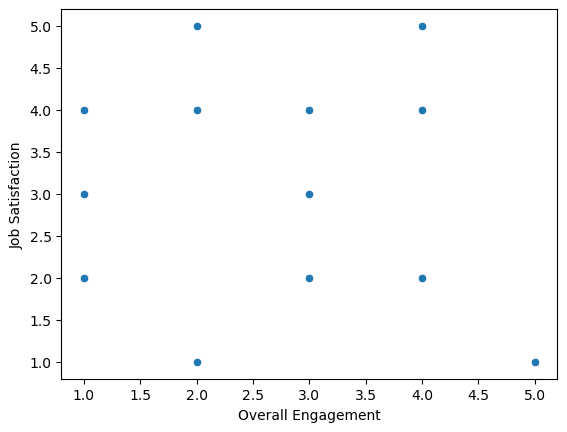

In [11]:
df[['Overall Engagement', 'Job Satisfaction']].corr(method = "spearman")

_ = sns.scatterplot( x = 'Overall Engagement', y = 'Job Satisfaction',data = df);
#_ = df.plot(x = 'Overall Engagement', y= 'Job Satisfaction',kind = "scatter")
plt.show()

### Descriptive Statistics 
##### Checking Trends between demographic groups (age, gender, ethinicity) and Areas (Work Life Balance, Job Satisfaction and Compensation Satisfaction

#### Descriptive Stats of all Likert Columns for each Age Bucket
1) Age is mildly +vely related with Company Communication 
2) Age is mildly -vely related with Career Development Opportunities and Workload Fairness	

In [12]:
age_dict = {"18-24" : 1, "25-34" : 2, "35-44" : 3, "45-54" : 4}
# as age bucket is also ordinal, we can replace these with ordinal numbers
df["Age_num"] = df['Age Bracket'].map(age_dict)

age_corr = []
for i in ordinal_cols:
    acr = df[["Age_num", i]].corr(method = "spearman").iloc[0,1]
    age_corr.append(acr)
pd.DataFrame({"variables" : ordinal_cols, "corr_with_Age" : age_corr})
#dict(zip(ordinal_cols,age_corr))

,variables,corr_with_Age
0,Job Satisfaction,0.335518
1,Work-Life Balance,0.142900
2,Management Support,0.299149
3,Team Collaboration,-0.014712
4,Workload Fairness,-0.504560
5,Career Development Opportunities,-0.593600
6,Workplace Inclusivity,-0.373780
7,Company Communication,0.518841
8,Compensation Satisfaction,-0.208367
9,Job Security,-0.015106


In [13]:
### Descriptive summary of all likert columns for each age bucket
smry_age = df.groupby(['Age Bracket']).describe(include = np.number)
smry_age.columns = [i[0] + "_" + i[1] for i in smry_age.columns]
smry_age

,Job Satisfaction_count,Job Satisfaction_mean,Job Satisfaction_std,Job Satisfaction_min,Job Satisfaction_25%,Job Satisfaction_50%,Job Satisfaction_75%,Job Satisfaction_max,Work-Life Balance_count,Work-Life Balance_mean,Work-Life Balance_std,Work-Life Balance_min,Work-Life Balance_25%,Work-Life Balance_50%,Work-Life Balance_75%,Work-Life Balance_max,Management Support_count,Management Support_mean,Management Support_std,Management Support_min,Management Support_25%,Management Support_50%,Management Support_75%,Management Support_max,Team Collaboration_count,Team Collaboration_mean,Team Collaboration_std,Team Collaboration_min,Team Collaboration_25%,Team Collaboration_50%,Team Collaboration_75%,Team Collaboration_max,Workload Fairness_count,Workload Fairness_mean,Workload Fairness_std,Workload Fairness_min,Workload Fairness_25%,Workload Fairness_50%,Workload Fairness_75%,Workload Fairness_max,Career Development Opportunities_count,Career Development Opportunities_mean,Career Development Opportunities_std,Career Development Opportunities_min,Career Development Opportunities_25%,Career Development Opportunities_50%,Career Development Opportunities_75%,Career Development Opportunities_max,Workplace Inclusivity_count,Workplace Inclusivity_mean,Workplace Inclusivity_std,Workplace Inclusivity_min,Workplace Inclusivity_25%,Workplace Inclusivity_50%,Workplace Inclusivity_75%,Workplace Inclusivity_max,Company Communication_count,Company Communication_mean,Company Communication_std,Company Communication_min,Company Communication_25%,Company Communication_50%,Company Communication_75%,Company Communication_max,Compensation Satisfaction_count,Compensation Satisfaction_mean,Compensation Satisfaction_std,Compensation Satisfaction_min,Compensation Satisfaction_25%,Compensation Satisfaction_50%,Compensation Satisfaction_75%,Compensation Satisfaction_max,Job Security_count,Job Security_mean,Job Security_std,Job Security_min,Job Security_25%,Job Security_50%,Job Security_75%,Job Security_max,Overall Engagement_count,Overall Engagement_mean,Overall Engagement_std,Overall Engagement_min,Overall Engagement_25%,Overall Engagement_50%,Overall Engagement_75%,Overall Engagement_max,Age_num_count,Age_num_mean,Age_num_std,Age_num_min,Age_num_25%,Age_num_50%,Age_num_75%,Age_num_max
Age Bracket,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18-24,7.0,2.571429,1.397276,1.0,2.0,2.0,3.0,5.0,7.0,2.857143,1.772811,1.0,1.50,2.0,4.50,5.0,7.0,2.571429,1.511858,1.0,1.50,2.0,3.50,5.0,7.0,3.142857,1.46385,1.0,2.50,3.0,4.00,5.0,7.0,3.428571,1.397276,1.0,3.0,3.0,4.5,5.0,7.0,3.571429,1.272418,2.0,2.50,4.0,4.50,5.0,7.0,3.000000,1.000000,1.0,3.0,3.0,3.5,4.0,7.0,2.428571,1.272418,1.0,1.5,2.0,3.5,4.0,7.0,3.571429,0.786796,3.0,3.00,3.0,4.00,5.0,7.0,2.571429,0.786796,2.0,2.00,2.0,3.00,4.0,7.0,2.571429,1.511858,1.0,1.50,2.0,3.50,5.0,7.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
25-34,3.0,3.000000,1.732051,1.0,2.5,4.0,4.0,4.0,3.0,1.333333,0.577350,1.0,1.00,1.0,1.50,2.0,3.0,4.333333,1.154701,3.0,4.00,5.0,5.00,5.0,3.0,3.000000,2.00000,1.0,2.00,3.0,4.00,5.0,3.0,2.333333,1.154701,1.0,2.0,3.0,3.0,3.0,3.0,3.666667,1.527525,2.0,3.00,4.0,4.50,5.0,3.0,2.000000,1.000000,1.0,1.5,2.0,2.5,3.0,3.0,2.666667,2.081666,1.0,1.5,2.0,3.5,5.0,3.0,2.666667,1.527525,1.0,2.00,3.0,3.50,4.0,3.0,2.333333,0.577350,2.0,2.00,2.0,2.50,3.0,3.0,2.333333,1.527525,1.0,1.50,2.0,3.00,4.0,3.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
35-44,2.0,4.000000,1.414214,3.0,3.5,4.0,4.5,5.0,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0,2.0,3.500000,2.121320,2.0,2.75,3.5,4.25,5.0,2.0,3.500000,2.12132,2.0,2.75,3.5,4.25,5.0,2.0,3.000000,2.828427,1.0,2.0,3.0,4.0,5.0,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0,2.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0,2.0,4.000000,1.414214,3.0,3.5,4.0,4.5,5.0,2.0,3.500000,2.121320,2.0,2.75,3.5,4.25,5.0,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0,2.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
45-54,3.0,3.333333,0.577350,3.0,3.0,3.0,3.5,4.0,3.0,4.333333

In [14]:
### Descriptive summary of all likert columns for each Gender
smry_gender = df.groupby(['Gender']).describe(include = np.number)
smry_gender.columns = [i[0] + "_" + i[1] for i in smry_gender.columns]
smry_gender

,Job Satisfaction_count,Job Satisfaction_mean,Job Satisfaction_std,Job Satisfaction_min,Job Satisfaction_25%,Job Satisfaction_50%,Job Satisfaction_75%,Job Satisfaction_max,Work-Life Balance_count,Work-Life Balance_mean,Work-Life Balance_std,Work-Life Balance_min,Work-Life Balance_25%,Work-Life Balance_50%,Work-Life Balance_75%,Work-Life Balance_max,Management Support_count,Management Support_mean,Management Support_std,Management Support_min,Management Support_25%,Management Support_50%,Management Support_75%,Management Support_max,Team Collaboration_count,Team Collaboration_mean,Team Collaboration_std,Team Collaboration_min,Team Collaboration_25%,Team Collaboration_50%,Team Collaboration_75%,Team Collaboration_max,Workload Fairness_count,Workload Fairness_mean,Workload Fairness_std,Workload Fairness_min,Workload Fairness_25%,Workload Fairness_50%,Workload Fairness_75%,Workload Fairness_max,Career Development Opportunities_count,Career Development Opportunities_mean,Career Development Opportunities_std,Career Development Opportunities_min,Career Development Opportunities_25%,Career Development Opportunities_50%,Career Development Opportunities_75%,Career Development Opportunities_max,Workplace Inclusivity_count,Workplace Inclusivity_mean,Workplace Inclusivity_std,Workplace Inclusivity_min,Workplace Inclusivity_25%,Workplace Inclusivity_50%,Workplace Inclusivity_75%,Workplace Inclusivity_max,Company Communication_count,Company Communication_mean,Company Communication_std,Company Communication_min,Company Communication_25%,Company Communication_50%,Company Communication_75%,Company Communication_max,Compensation Satisfaction_count,Compensation Satisfaction_mean,Compensation Satisfaction_std,Compensation Satisfaction_min,Compensation Satisfaction_25%,Compensation Satisfaction_50%,Compensation Satisfaction_75%,Compensation Satisfaction_max,Job Security_count,Job Security_mean,Job Security_std,Job Security_min,Job Security_25%,Job Security_50%,Job Security_75%,Job Security_max,Overall Engagement_count,Overall Engagement_mean,Overall Engagement_std,Overall Engagement_min,Overall Engagement_25%,Overall Engagement_50%,Overall Engagement_75%,Overall Engagement_max,Age_num_count,Age_num_mean,Age_num_std,Age_num_min,Age_num_25%,Age_num_50%,Age_num_75%,Age_num_max
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,9.0,3.222222,1.301708,2.0,2.0,3.0,4.00,5.0,9.0,2.888889,1.833333,1.0,1.00,2.0,5.00,5.0,9.0,3.111111,1.691482,1.0,2.00,3.0,5.0,5.0,9.0,3.222222,1.301708,1.0,3.0,3.0,4.0,5.0,9.0,2.888889,1.269296,1.0,3.0,3.0,3.00,5.0,9.0,3.111111,1.166667,2.0,2.00,3.0,4.00,5.0,9.0,2.666667,1.00000,1.0,2.00,3.0,3.0,4.0,9.0,2.666667,1.500000,1.0,1.00,3.0,4.0,5.0,9.0,3.111111,1.166667,1.0,3.0,3.0,4.0,5.0,9.0,1.888889,0.600925,1.0,2.0,2.0,2.00,3.0,9.0,2.333333,1.414214,1.0,1.00,2.0,4.0,4.0,9.0,1.777778,1.092906,1.0,1.00,1.0,2.00,4.0
Male,6.0,2.666667,1.366260,1.0,1.5,3.0,3.75,4.0,6.0,2.333333,1.505545,1.0,1.25,2.0,2.75,5.0,6.0,3.333333,1.366260,2.0,2.25,3.0,4.5,5.0,6.0,3.000000,1.673320,1.0,2.0,2.5,4.5,5.0,6.0,2.500000,1.974842,1.0,1.0,1.5,4.25,5.0,6.0,2.666667,1.861899,1.0,1.25,2.0,4.25,5.0,6.0,2.333333,1.21106,1.0,1.25,2.5,3.0,4.0,6.0,3.666667,1.505545,2.0,2.25,4.0,5.0,5.0,6.0,3.500000,1.048809,2.0,3.0,3.5,4.0,5.0,6.0,3.666667,1.211060,2.0,3.0,3.5,4.75,5.0,6.0,3.000000,1.095445,2.0,2.25,3.0,3.0,5.0,6.0,2.500000,1.378405,1.0,1.25,2.5,3.75,4.0


##### Checking Trends between Age Bracket & Job Satisfaction
1) 35-44 Age Bracket has maximum average Job Satisfaction
2) 18-24 Age Bracket has Least average Job Satisfaction

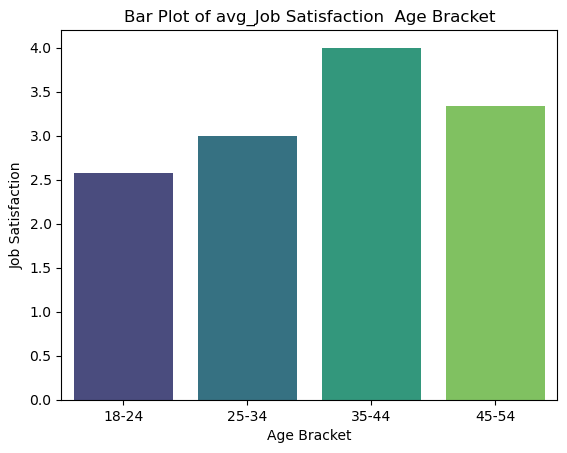

In [15]:
x_var = 'Age Bracket'; y_var = 'Job Satisfaction'
age_js_smry = df.groupby(x_var, as_index = False)[y_var].mean()#.reset_index()
#print(f"Average of {y_var} for each {x_var}:")
#print(age_js_smry)

_ = sns.barplot(x=x_var, y=y_var, data=age_js_smry, hue = x_var, palette='viridis',).set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show()

##### Checking Trends between Age Bracket & Work-Life Balance
1) 45-54 Age Bracket has Best Worklife balnce
2) 25-34 Age Bracket has Worst WorkLife Balance

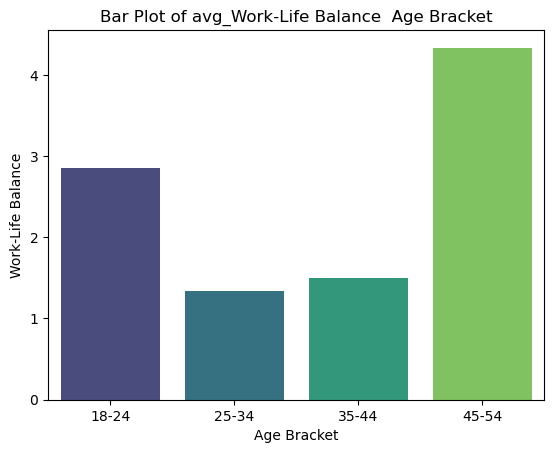

In [16]:
x_var = 'Age Bracket'; y_var = 'Work-Life Balance'
age_wrk_smry= df.groupby(x_var, as_index= False)[y_var].mean()
#print(f"Average of {y_var} for each {x_var}:")
#print(age_wrk_smry)

_ = sns.barplot(x=x_var, y=y_var, data=age_wrk_smry, hue=x_var, palette= 'viridis' ,).set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show()

##### Checking Trends between Age Bracket & Compensation Satisfaction
1) 18-24 Age Bracket has Best Compensation Satisfaction
2) 25-34 Age Bracket has Worst Compensation Satisfaction

In [17]:
x_var = 'Age Bracket'; y_var= 'Compensation Satisfaction'
age_comp_sats = df.groupby(x_var, as_index= False)[y_var].mean()
#print(f"Average of {y_var} for each {x_var}:")
print(age_comp_sats)
_ = sns.barplot(x=x_var, y= y_var, data=age_comp_sats, hue=x_var, palette='viridis',).set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show

  Age Bracket  Compensation Satisfaction
0       18-24                   3.571429
1       25-34                   2.666667
2       35-44                   3.500000
3       45-54                   3.000000


<function matplotlib.pyplot.show(close=None, block=None)>

##### Checking Trends between Gender & Work-Life Balance
1) Females have better Work-Life Balance than Males

Average of Work-Life Balance for each Gender:
   Gender  Work-Life Balance
0  Female           2.888889
1    Male           2.333333


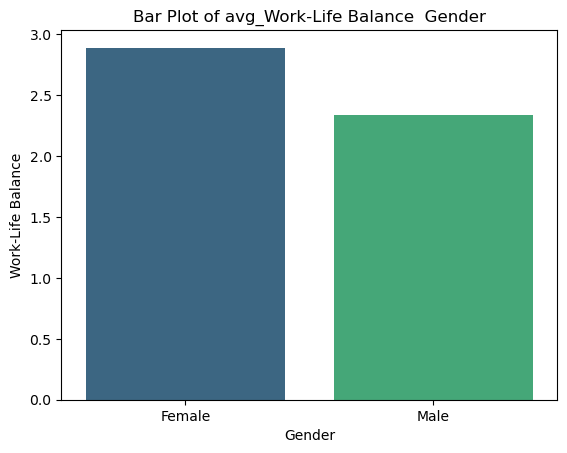

In [27]:
x_var = 'Gender'; y_var = 'Work-Life Balance'
gender_wlb_smry = df.groupby(x_var, as_index = False)[y_var].mean()#.reset_index()
print(f"Average of {y_var} for each {x_var}:")
print(gender_wlb_smry)

_ = sns.barplot(x=x_var, y=y_var, data=gender_wlb_smry, hue = x_var, palette='viridis',).set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show()

##### Checking Trends between Gender & Compensation Satisfaction
1) Females have poorer Compensation Satisfaction as compared to Males

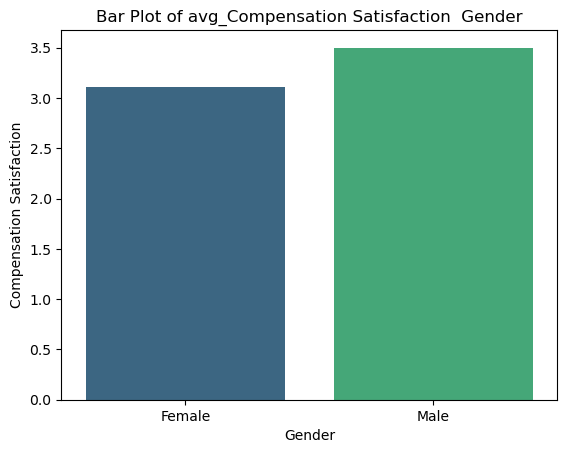

In [19]:
x_var = 'Gender'; y_var = 'Compensation Satisfaction'
gender_cs_smry = df.groupby(x_var, as_index = False)[y_var].mean()#.reset_index()
#print(f"Average of {y_var} for each {x_var}:")
#print(age_job_sat)

_ = sns.barplot(x=x_var, y=y_var, data=gender_cs_smry, hue = x_var, palette='viridis',).set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show()

##### Checking Trends between Gender & Job Satisfaction
1) Females have better Job Satisfaction than Males

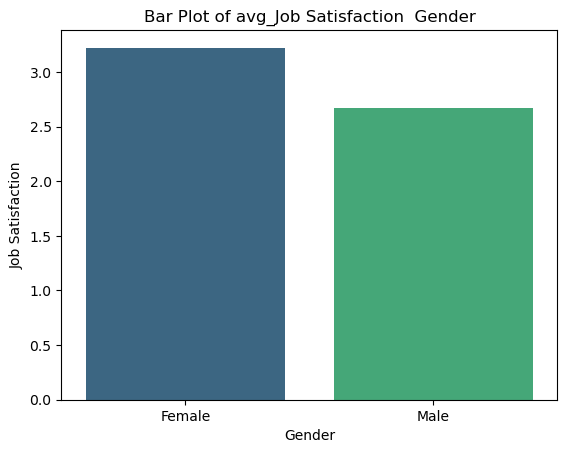

In [20]:
x_var = 'Gender'; y_var = 'Job Satisfaction'
gender_cs_smry = df.groupby(x_var, as_index = False)[y_var].mean()#.reset_index()
#print(f"Average of {y_var} for each {x_var}:")
#print(age_job_sat)

_ = sns.barplot(x=x_var, y=y_var, data=gender_cs_smry, hue = x_var, palette='viridis').set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show()

##### Checking Trends between Ethnicity & Job Satisfaction
1) Indians Have best Job Satisfaction
2) Caucasian and Hispanics have lowest job satisfaction

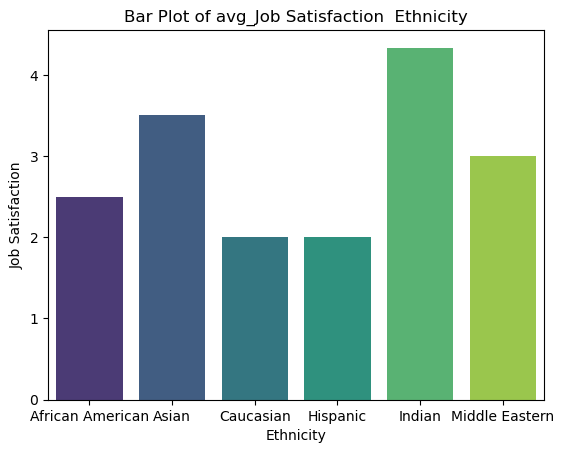

In [21]:
x_var = 'Ethnicity'; y_var = 'Job Satisfaction'
ethnicity_job_sat = df.groupby(x_var, as_index = False)[y_var].mean()#.reset_index()
#print(f"Average of {y_var} for each {x_var}:")
#print(ethnicity_job_sat)

_ = sns.barplot(x=x_var, y=y_var, data=ethnicity_job_sat, hue = x_var, palette='viridis').set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show()

##### Checking Trends between Ethnicity & Work-Life Balance
1) Hispanics have best work life balance
2) Caucasians have worst work life balance

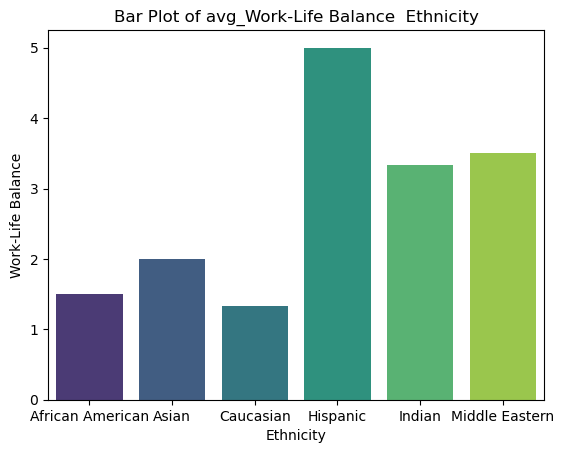

In [22]:
x_var = 'Ethnicity'; y_var = 'Work-Life Balance'
ethnicity_wrk_smry = df.groupby(x_var, as_index = False)[y_var].mean()#.reset_index()
#print(f"Average of {y_var} for each {x_var}:")
#print(ethnicity_wrk_smry)

_ = sns.barplot(x=x_var, y=y_var, data=ethnicity_wrk_smry, hue = x_var, palette='viridis').set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show()

##### Checking Trends between Ethnicity & Compensation Satisfaction
1) Caucasians have best Compensation Satisfaction
2) Indians have worst Compensation Satisfaction

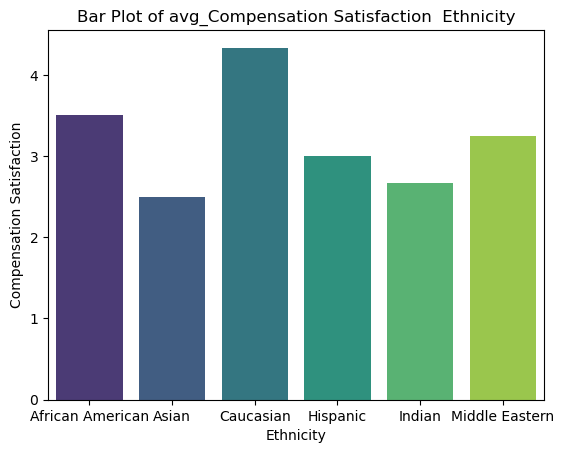

In [23]:
x_var = 'Ethnicity'; y_var = 'Compensation Satisfaction'
ethnicity_comp_sat = df.groupby(x_var, as_index = False)[y_var].mean()#.reset_index()
#print(f"Average of {y_var} for each {x_var}:")
#print(ethnicity_comp_sat)

_ = sns.barplot(x=x_var, y=y_var, data=ethnicity_comp_sat, hue = x_var, palette='viridis').set_title(f"Bar Plot of avg_{y_var}  {x_var}");
plt.show()

### Inferential Statistics
#### Hypothesis Testing: Difference in Job Satisfaction between IT and HR Departments
1) **Null Hypothesis (H0)**: There is no significant difference in Job Satisfaction between IT and HR departments
2) **Alternative Hypothesis (H1)**: There is a significant difference in Job Satisfaction between IT and HR departments


#### Results
1) To test the hypothesis, T test was supposed to be carried out
2) But the problem is that there is only 1 data point for IT and 2 data points for HR
3) Due to this, testing is not giving proper results and is returning nan
4) If p_value >= 0.05, then Failed to reject Null Hypothesis i.e. No significant difference between IT and HR

In [24]:
# Extract Job Satisfaction scores for each department
df_it = df.loc[df['Department'] == "IT",'Job Satisfaction']
df_hr = df.loc[df['Department'] == "HR",'Job Satisfaction']
df_it
df_hr

t_stat, p_value = ttest_ind(df_it, df_hr, equal_var=False)  # Welch's t-test
(t_stat, p_value)

8    5
Name: Job Satisfaction, dtype: int64

3    3
6    1
Name: Job Satisfaction, dtype: int64

C:\Users\sniha\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\sniha\miniconda3\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


(nan, nan)

#### Correlation Anlysis between Worklife Balance and Overall Engagement
1) Since p-value (0.1909) >= 0.05, the correlation is not statistically significant
2) Since spearman_corr -0.35744 < 0,  which means that Work-Life Balance and Overall Engagement are inversely proportional

In [25]:
# Since both variables are ordinal and mapped to numerical values, Spearman's correlation will be used
wlb = df['Work-Life Balance']
oe = df['Overall Engagement']

# Calculating Spearman's rank correlation
spearman_corr, spearman_p = spearmanr(wlb, oe)

print(f"Spearman's correlation coefficient: {spearman_corr:.4f}")
print(f"p-value: {spearman_p:.4f}")

Spearman's correlation coefficient: -0.3574
p-value: 0.1909


#### Correlation Anlysis between all Likert Columns
1) **Compensation Satisfaction, Team Collaboration and Workload Fairness** are mildly +ve correlated (~ +0.6)
2) **Career Development Opportunities and Job Satisfaction** are mildly -ve correlated (-0.65)

<Axes: >

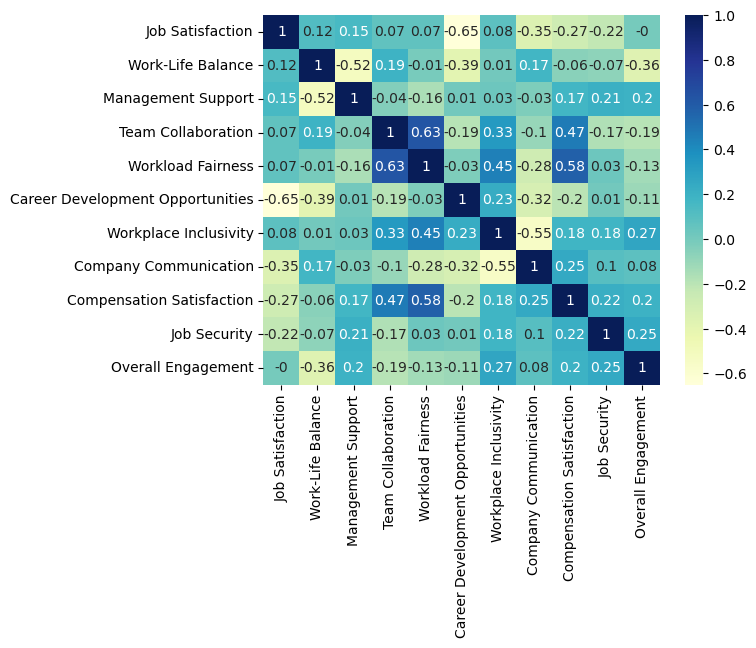

(array([0, 3, 4, 4, 5, 6, 7, 8], dtype=int64),
 array([5, 4, 3, 8, 0, 7, 6, 4], dtype=int64))

In [26]:
cor_mat = df[ordinal_cols].corr(method="spearman").round(2)
sns.heatmap(cor_mat, annot=True, cmap="YlGnBu")
plt.show()
np.where((abs(cor_mat) >= 0.55) & (abs(cor_mat) < 1)) # correlation threshold of 0.7 and excluding 1 for diagonal elements

### Recommendations
1) Focus should be given to Caucasians Ethinicity as they have very poor job satisfaction & Work life balance
2) As age is increasing, Workload Fairness & Career Development Opportunities is decreasing. Management should be giving equal work loads across all age bracket.
3) Overall Engagement is not related to any likert columns, this raises the concern about correctness of the survey

### ********** THE END ***********